In [3]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
import pandas as pd
import cv2
import PIL
from PIL import Image, ImageEnhance, ImageDraw, ImageFont
from IPython.display import display
from sklearn.model_selection import train_test_split

In [4]:
# Load the data
train_data = pd.read_csv("emnist-balanced-train.csv")
test_data = pd.read_csv("emnist-balanced-test.csv")

In [5]:
print(train_data.shape)
print(test_data.shape)

(112799, 785)
(18799, 785)


In [6]:
#training_letters
y1 = np.array(train_data.iloc[:,0].values)
x1 = np.array(train_data.iloc[:,1:].values)
#testing_labels
y2 = np.array(test_data.iloc[:,0].values)
x2 = np.array(test_data.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)


(112799,)
(112799, 784)


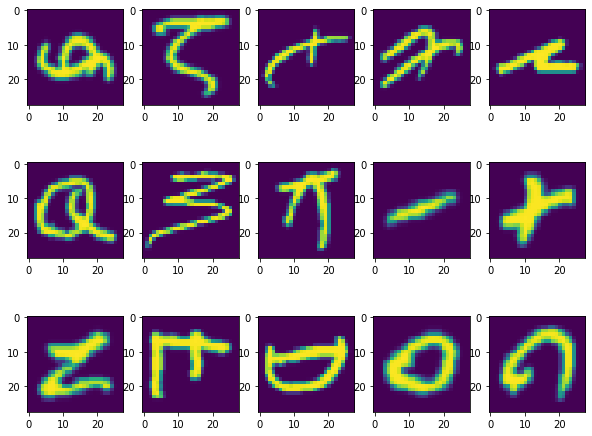

In [7]:
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

In [26]:
number_of_classes = 47

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [27]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [32]:
model = Sequential([
Conv2D(32,(5,5), input_shape=(28, 28, 1),activation="relu"),              
MaxPooling2D(pool_size = (2,2)),
Dropout(0.3),
Flatten(),
Dense(128,activation = "relu"),
Dense(number_of_classes,activation = "softmax")

])
model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])



In [24]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [33]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_22 (Dense)             (None, 47)                6063      
Total params: 596,847
Trainable params: 596,847
Non-trainable params: 0
________________________________________________

In [34]:
MCP = ModelCheckpoint('Best_points_nishanth.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)


In [35]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Train on 90239 samples, validate on 22560 samples
Epoch 1/10
90080/90239 [============================>.] - ETA: 0s - loss: 0.8049 - accuracy: 0.7548
Epoch 00001: val_accuracy improved from -inf to 0.83076, saving model to Best_points_nishanth.h5
90239/90239 [==============================] - 30s 329us/sample - loss: 0.8043 - accuracy: 0.7549 - val_loss: 0.5012 - val_accuracy: 0.8308
Epoch 2/10
90208/90239 [============================>.] - ETA: 0s - loss: 0.4813 - accuracy: 0.8359
Epoch 00002: val_accuracy improved from 0.83076 to 0.84592, saving model to Best_points_nishanth.h5
90239/90239 [==============================] - 28s 308us/sample - loss: 0.4814 - accuracy: 0.8359 - val_loss: 0.4382 - val_accuracy: 0.8459
Epoch 3/10
90080/90239 [============================>.] - ETA: 0s - loss: 0.4140 - ac

Text(0, 0.5, 'Accuray')

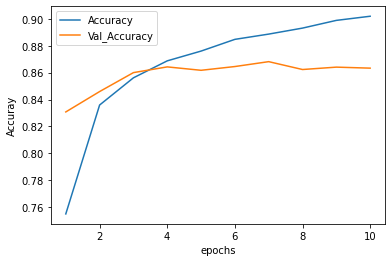

In [36]:
import seaborn as sns
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [38]:
test_loss, test_accuracy = model.evaluate(test_x,test_y)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

22560/22560 [==============================] - 2s 88us/sample - loss: 0.3872 - accuracy: 0.8682
Test loss: 0.3871571917535988
Test accuracy: 0.8681737780570984


In [42]:

my_lol_img = cv2.imread('A_img.png', cv2.IMREAD_GRAYSCALE)
my_lol_img = cv2.resize(my_lol_img, (28, 28))
my_img = my_lol_img[np.newaxis,...,np.newaxis]
my_img.shape

(1, 28, 28, 1)

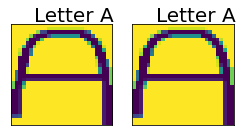

In [43]:
fig, axes = plt.subplots(1, 2,figsize = (4,4))
fig.subplots_adjust(hspace=-0.7, wspace= 0.2)
for i,ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(my_img))
    ax.text(6., -1.0, f'Letter A',fontsize = 20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
          
    
plt.show()

In [44]:
predict = model.predict(my_img)
answer = np.argmax(predict)
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'
print(class_mapping[answer+1])


R
